In [1]:
import pandas_datareader as pdr
import os

In [43]:
df = pdr.get_data_tiingo('TSLA', api_key=KEY)

In [3]:
df.to_csv('data.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,TSLA,2022-01-24 00:00:00+00:00,930.00,933.5131,851.47,904.76,50791714,930.00,933.5131,851.47,904.76,50791714,0.0,1.0
1256,TSLA,2022-01-25 00:00:00+00:00,918.40,951.2600,903.21,914.20,28865302,918.40,951.2600,903.21,914.20,28865302,0.0,1.0
1257,TSLA,2022-01-26 00:00:00+00:00,937.41,987.6900,906.00,952.43,34955761,937.41,987.6900,906.00,952.43,34955761,0.0,1.0
1258,TSLA,2022-01-27 00:00:00+00:00,829.10,935.3900,829.00,933.36,49036523,829.10,935.3900,829.00,933.36,49036523,0.0,1.0
1259,TSLA,2022-01-28 00:00:00+00:00,846.35,857.5000,792.01,831.56,44929650,846.35,857.5000,792.01,831.56,44929650,0.0,1.0


In [7]:
df2 = df.reset_index()['close']

In [8]:
df2.shape

(1260,)

In [9]:
df2

0       250.63
1       251.93
2       249.24
3       251.55
4       251.33
         ...  
1255    930.00
1256    918.40
1257    937.41
1258    829.10
1259    846.35
Name: close, Length: 1260, dtype: float64

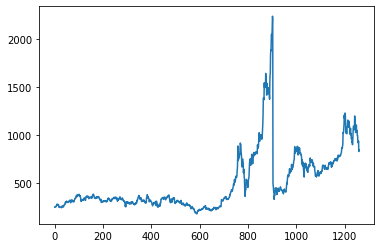

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [11]:
from matplotlib import scale
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [12]:
df2.shape

(1260, 1)

In [13]:
df2

array([[0.03479012],
       [0.03542126],
       [0.03411529],
       ...,
       [0.36821408],
       [0.3156308 ],
       [0.32400548]])

In [14]:
training = int(len(df2) * 0.65)
test = len(df2) - training
train_data, test_data = df2[0 : training, :], df2[training : len(df2), :1]

In [15]:
# the time_step parameter plays an impotant role in predicting the the next output based on the previous inputs 
# basically considering how much previous inputs we need to consider
def creating_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
x_train, y_train = creating_dataset(train_data, time_step)
x_test, y_test = creating_dataset(test_data, time_step)

In [17]:
x_train

array([[0.03479012, 0.03542126, 0.03411529, ..., 0.09264582, 0.09383041,
        0.09585004],
       [0.03542126, 0.03411529, 0.03523677, ..., 0.09383041, 0.09585004,
        0.09886493],
       [0.03411529, 0.03523677, 0.03512997, ..., 0.09585004, 0.09886493,
        0.09927274],
       ...,
       [0.07568769, 0.07633339, 0.0747944 , ..., 0.26854324, 0.2556875 ,
        0.26516424],
       [0.07633339, 0.0747944 , 0.073503  , ..., 0.2556875 , 0.26516424,
        0.30089621],
       [0.0747944 , 0.073503  , 0.07618289, ..., 0.26516424, 0.30089621,
        0.28651118]])

In [18]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size =64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 16s 537ms/step - loss: 0.0029 - val_loss: 0.0162
Epoch 2/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 3/100
12/12 [==============================] - 4s 323ms/step - loss: 7.4686e-04 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 4s 336ms/step - loss: 6.3253e-04 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 4s 332ms/step - loss: 5.4079e-04 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 4s 333ms/step - loss: 4.7282e-04 - val_loss: 0.0014
Epoch 7/100
12/12 [==============================] - 4s 322ms/step - loss: 3.7463e-04 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 4s 328ms/step - loss: 3.3059e-04 - val_loss: 0.0021
Epoch 9/100
12/12 [==============================] - 4s 325ms/step - loss: 3.2423e-04 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 4s 325ms

In [23]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

357.98585247980395

In [26]:
math.sqrt(mean_squared_error(y_test, test_predict))

733.9125101100244

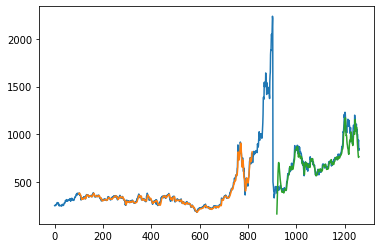

In [28]:
look = 100
trainplot = np.empty_like(df2)
trainplot[:,  :] = np.nan
trainplot[look:len(train_predict) + look, :] = train_predict

testplot = np.empty_like(df2)
testplot[:,  :] = np.nan
testplot[len(train_predict) + (look * 2) + 1 : len(df2) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainplot)
plt.plot(testplot)
plt.show()

In [29]:
len(test_data)

441

In [30]:
x_input = test_data[341 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
lst_output = []
n = 100
i = 0
while (i < 30):
  if(len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n, 1))
    y = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, y))
    temp_input.extend(y[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(y.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n, 1))
    y = model.predict(x_input, verbose = 0)
    print(y[0])
    temp_input.extend(y[0].tolist())
    print(len(temp_input))
    lst_output.extend(y.tolist())
    i = i + 1

print(lst_output)

[0.25166923]
101
1 day input [0.27958811 0.27056288 0.27383021 0.27455359 0.28005904 0.2806222
 0.28183592 0.26760139 0.27207275 0.27817048 0.27899582 0.28906971
 0.29730845 0.29060871 0.29242929 0.28959889 0.28947266 0.2925361
 0.29207974 0.29312839 0.2984008  0.29445863 0.29759003 0.30428007
 0.30688229 0.31039723 0.32239365 0.33554069 0.33270543 0.33344823
 0.34713901 0.35475148 0.41067007 0.40754838 0.41698143 0.43600287
 0.45394654 0.49986892 0.48210488 0.50242744 0.51021954 0.50642302
 0.47770636 0.41000981 0.43158978 0.42943421 0.41482586 0.40510152
 0.42517162 0.44181417 0.44539223 0.46514191 0.47475944 0.45153366
 0.45491752 0.43837206 0.46510792 0.46888017 0.44472225 0.43967317
 0.40586859 0.40297508 0.42372486 0.43208013 0.40044568 0.40686869
 0.38229325 0.37845789 0.38694424 0.3631213  0.36586432 0.35002282
 0.36875783 0.40290711 0.43112857 0.44420763 0.44155201 0.4404451
 0.4327501  0.42616687 0.49559176 0.47122508 0.44138209 0.43001194
 0.4116896  0.42681743 0.4298663  0.

In [34]:
nday = np.arange(1, 101)
pday = np.arange(101, 131)

In [37]:
len(df2)

1260

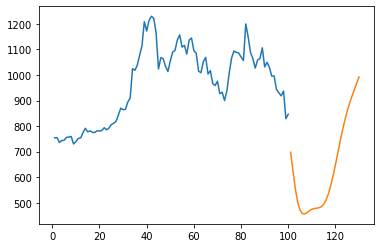

In [38]:
plt.plot(nday, scaler.inverse_transform(df2[1160:]))
plt.plot(pday, scaler.inverse_transform(lst_output))

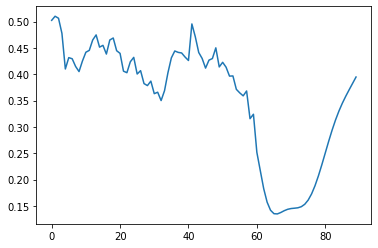

In [40]:
df3 = df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])